<h2>Importando as bibliotecas necessárias


In [1]:
import requests as rq
import pandas as pd

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

from io import BytesIO
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

C:\Users\kairo\AppData\Local\Temp\ipykernel_6468\341868361.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # or 199


<h2>Criando o dataframe das planilhas hospedadas no github

In [2]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Header/Api_Header.xlsx?raw=true"
data = rq.get(url).content
df_header = pd.read_excel(BytesIO(data))
df_header.drop('Unnamed: 0', axis='columns',inplace=True)

In [3]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Principal/Async_Api_Principal.xlsx?raw=true"
data = rq.get(url).content
df = pd.read_excel(BytesIO(data))
df.drop(['DESC_OBJ_CONTRAT','Unnamed: 0','ANEXOS','ITEMS'], axis='columns',inplace=True)

In [4]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/DISPUTE_MODE/Dispute_Mode.xlsx?raw=true"
data = rq.get(url).content
df_dispute_mode = pd.read_excel(BytesIO(data))
df_dispute_mode.set_axis(['DISPUTE_MODE','DM_DESCRICAO','DM_CARACTERISTICA','DM_DESC_CURTA'],axis=1,inplace=True)
df_dispute_mode.head()

,DISPUTE_MODE,DM_DESCRICAO,DM_CARACTERISTICA,DM_DESC_CURTA
0,1,MODO DE DISPUTA ABERTO,LEILÃO APÓS O TÉRMINO DO ENVIO DAS PROPOSTAS,LEILÃO
1,2,MODO DE DISPUTA FECHADO,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE
2,3,PREGÃO,LEILÃO APÓS O TÉRMINO DO ENVIO DAS PROPOSTAS ATÉ 50MIL,LEILÃO
3,4,MODO DISPUTA ABERTA DIRETA,NaN,NaN


In [5]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/SUB_STATUS/Sub_Status.xlsx?raw=true"
data = rq.get(url).content
df_sub_status = pd.read_excel(BytesIO(data))
df_sub_status.head()

,SUB_STATUS,SUB_STATUS_D
0,1,Todos
1,2,Homologado
2,3,Adjudicado
3,4,Cancelada


In [6]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/Hist%C3%B3rico/Historico_RELEVANT_DATES.xlsx?raw=true"
data = rq.get(url).content
df_relevant_dates = pd.read_excel(BytesIO(data))
df_relevant_dates.drop(['Unnamed: 0','PUBL_DATE'], axis='columns',inplace=True)
df_relevant_dates.head()

,START_DATE,START_TIME,RECURSAL_PERIOD,END_TIME,END_DATE,COMMERCIAL_PROP_OPEN_TIME,COMMERCIAL_PROP_OPEN_DATE,DIVULG_DATE,OPPORT_NUM
0,2018-02-06,10:00:00,0000-00-00,14:00:00,2018-03-01,14:00:00,2018-03-01,[],7001980909
1,2018-02-06,11:00:00,0000-00-00,08:00:00,2018-03-12,08:00:00,2018-03-12,[],7001980938
2,2018-02-06,10:30:00,2018-06-19,14:00:00,2018-04-16,14:00:00,2018-04-16,"[{'YPCON_DATE': '2018-06-12', 'YPCON_TIME': '16:58:42'}]",7001981014
3,2018-02-07,12:00:00,2018-06-13,14:00:00,2018-04-17,14:00:00,2018-04-17,"[{'YPCON_DATE': '2018-06-06', 'YPCON_TIME': '10:47:14'}]",7001981474
4,2018-02-07,17:00:00,0000-00-00,12:00:00,2018-04-13,12:00:00,2018-04-13,[],7001981745


In [7]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/OPPORT_TYPE/Opport_type.xlsx?raw=true"
data = rq.get(url).content
df_opport_types = pd.read_excel(BytesIO(data))
df_opport_types.head()

,OPPORT_TYPE,OPPORT_TYPE_DESC,Julgamento
0,AFNI,AFRETAMENTO N-INT IT,ITEM
1,DAII,DISPUTA ABERTA INTEGRADA ITEM,ITEM
2,DANI,DISPUTA ABERTA NÃO INTEGRADA ITEM,ITEM
3,LICI,LICITAÇÃO PÚBLICA INTEGRADA ITEM,ITEM
4,LNII,LICITAÇÃO PÚBLICA NÃO INTEGRADA ITEM,ITEM


<h2>Conhecendo algumas informações dos dataframes

In [8]:
print(f'principal {df.shape}')
print(f'header {df_header.shape}')
print(f'dispute mode {df_dispute_mode.shape}')
print(f'sub status {df_sub_status.shape}')
print(f'relevant dates {df_relevant_dates.shape}')
print(f'opport types {df_opport_types.shape}')

principal (9952, 29)
header (45917, 32)
dispute mode (4, 4)
sub status (4, 2)
relevant dates (9892, 9)
opport types (19, 3)


<h2> Juntando os dataframes

In [9]:
display('### dtypes df')
display(df[['OPPORT_NUM','DISPUTE_MODE','SUB_STATUS','OPPORT_TYPE']].dtypes)
display('### dtypes df_dispute_mode')
display(df_dispute_mode.dtypes)
display('### dtypes df_sub_status')
display(df_sub_status.dtypes)
display('### dtypes df_header')
display(df_header[['OPPORT_NUM']].dtypes)
display('### dtypes df_header')
display(df_relevant_dates[['OPPORT_NUM']].dtypes)
display('### dtypes df_opport_types')
display(df_opport_types.dtypes)


'### dtypes df'

OPPORT_NUM      int64 
DISPUTE_MODE    int64 
SUB_STATUS      int64 
OPPORT_TYPE     object
dtype: object

'### dtypes df_dispute_mode'

DISPUTE_MODE         int64 
DM_DESCRICAO         object
DM_CARACTERISTICA    object
DM_DESC_CURTA        object
dtype: object

'### dtypes df_sub_status'

SUB_STATUS      int64 
SUB_STATUS_D    object
dtype: object

'### dtypes df_header'

OPPORT_NUM    int64
dtype: object

'### dtypes df_header'

OPPORT_NUM    int64
dtype: object

'### dtypes df_opport_types'

OPPORT_TYPE         object
OPPORT_TYPE_DESC    object
Julgamento          object
dtype: object

In [10]:
df = df.merge(df_dispute_mode,on='DISPUTE_MODE')
df = df.merge(df_sub_status,on='SUB_STATUS')
df = df.merge(df_header,on='OPPORT_NUM')
df = df.merge(df_relevant_dates,on='OPPORT_NUM')
df = df.merge(df_opport_types,on='OPPORT_TYPE')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45994 entries, 0 to 45993
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OPPORT_NUM                 45994 non-null  int64  
 1   DOU_NUM                    0 non-null      float64
 2   LIMIT_IN_DAYS              45994 non-null  int64  
 3   COMPANY                    45994 non-null  int64  
 4   COMPANY_DESC               45994 non-null  object 
 5   STATUS                     31921 non-null  object 
 6   STATUS_DESC                31921 non-null  object 
 7   OPPORT_TYPE                45994 non-null  object 
 8   POSTING_DATE               45994 non-null  object 
 9   OPPORT_DESCR               45992 non-null  object 
 10  DOU_PUBL_DATE              45994 non-null  object 
 11  START_DATE_x               45994 non-null  object 
 12  START_HOUR                 45994 non-null  object 
 13  END_DATE_x                 45994 non-null  obj

<h2>Analisando numero de registros por oportunidade</br>
Aparentemente está com registros duplicados baseado em alguma coluna

In [11]:
df['OPPORT_NUM'].value_counts().to_frame().sort_values('OPPORT_NUM',ascending=False).head()

,OPPORT_NUM
7002573241,62
7002156592,46
7003287223,45
7002156928,42
7002675575,41


<h2>Faz um loop nas colunas para entender qual tem valores distintos e remove

In [12]:
checa=df[df['OPPORT_NUM']==7002573241]
colunas_duplicadas = []

for t in checa.columns.to_list():
    if len(checa[t].unique()) >1:
        colunas_duplicadas.append(t)
df.drop(colunas_duplicadas,axis='columns',inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
display('Colunas detectadas no arquivo que estavam impedindo que 1 oportunidade ocupasse somente 1 linha',colunas_duplicadas)

'Colunas detectadas no arquivo que estavam impedindo que 1 oportunidade ocupasse somente 1 linha'

['ATTACHMENTS']

<h3>EXECUTA NOVAMENTE O COMANDO

In [13]:
df['OPPORT_NUM'].value_counts().to_frame().sort_values('OPPORT_NUM',ascending=False).head()

,OPPORT_NUM
7001983403,1
7001989627,1
7002136436,1
7001998904,1
7001993452,1


<h2>Dropa as colunas que estejam 100% vazias

In [14]:
#dropar colunas vazias
#how=all, dropa somente quando a coluna inteira está vazia
df.dropna(axis='columns',how='all',inplace=True)

<h2> Dropar as colunas que possuem somente 1 valor em todo o dataset

In [15]:
#dropar colunas que tem somente 1 registro para todo o dataset
lista_colunas = df.columns.to_list()
lista_valor_unico_remover = []
for row in lista_colunas:
  if len(df[row].unique()) == 1:
    lista_valor_unico_remover.append(row)
print(lista_valor_unico_remover)
df.drop(columns=lista_valor_unico_remover,inplace=True)

['LIMIT_IN_DAYS', 'COMPANY', 'COMPANY_DESC', 'POSTING_DATE', 'OPEN_DATE', 'OPEN_HOUR', 'PQ_VENDOR_LIST_DATE', 'PQ_VENDOR_LIST_HOUR', 'REGIONS', 'CO_CODE', 'EMP_DESCRIPTION']


<h2> checando colunas com sufixo _x e _y. Essas colunas são criadas automaticamente pelo pandas quando no merge elas tem o mesmo nome </br>
Abaixo são verificadas essas colunas, comparados os dados de ambas e se forem realmente identicas, deixa somente uma delas

In [16]:
lista_colunas = df.columns.to_list()
cols_duplicadas = []
for cols in lista_colunas:
     if '_x' in cols or '_y' in cols:
         cols_duplicadas.append(cols.replace('_x','').replace('_y',''))
dict_colunas_repetidas = {}
for  cols_dpl in set(sorted(cols_duplicadas)):
    set_comparacao = set((df[cols_dpl+'_y'] == df[cols_dpl+'_x']).to_list())
    if len(set_comparacao) == 1 and list(set_comparacao)[0]:
        print(cols_dpl, '  ', set_comparacao)
        df[cols_dpl] = df[cols_dpl+'_x']
        print([cols_dpl+'_y',cols_dpl+'_x'])
        df.drop([cols_dpl+'_y',cols_dpl+'_x'], axis='columns',inplace=True)

END_DATE    {True}
['END_DATE_y', 'END_DATE_x']
AUC_START_TIME    {True}
['AUC_START_TIME_y', 'AUC_START_TIME_x']
AUC_START_DATE    {True}
['AUC_START_DATE_y', 'AUC_START_DATE_x']
DISPUTE_MODE    {True}
['DISPUTE_MODE_y', 'DISPUTE_MODE_x']
START_DATE    {True}
['START_DATE_y', 'START_DATE_x']


In [17]:
for cols in df.columns.to_list():
     if '_x' in cols or '_y' in cols:
        print(cols)

START_TIME_x
START_TIME_y


<h2> Preenche todos os registros que estejam nulos com a instrução "SEM |Nome da coluna|"

In [18]:
# lista_colunas = df.columns.to_list()
# for lst_cols in lista_colunas:
#     if df[lst_cols].value_counts().sum() != df.shape[0]:
#         df[lst_cols].fillna('SEM '+lst_cols,inplace=True)

<h2> Colunas à Dropar

In [19]:
display(df['HISTORY'].value_counts())
display(df['HISTORY_DYN_NAME'].value_counts())
display(df['MESSAGES'].value_counts())
display(df['DISPLAY_PROP_LANCE'].value_counts())
df.drop(['HISTORY','HISTORY_DYN_NAME','MESSAGES','DISPLAY_PROP_LANCE'],axis='columns',inplace=True)

X    8146
Name: HISTORY, dtype: int64

Historic             6219
Historic and Atas    1927
Name: HISTORY_DYN_NAME, dtype: int64

X    7990
Name: MESSAGES, dtype: int64

X    8146
Name: DISPLAY_PROP_LANCE, dtype: int64

In [20]:
df['DESCRIPTION'] = df['YPCON_OBJ_CONT_DESC']
df.drop(['OPPORT_DESCR','YPCON_OBJ_CONT_DESC'],axis='columns',inplace=True)

<h2> Combinar colunas código + descrição

In [21]:
df.columns

Index(['OPPORT_NUM', 'STATUS', 'STATUS_DESC', 'OPPORT_TYPE', 'DOU_PUBL_DATE',
       'START_HOUR', 'END_HOUR', 'SUB_STATUS', 'DM_DESCRICAO',
       'DM_CARACTERISTICA', 'DM_DESC_CURTA', 'SUB_STATUS_D', 'DESCRIPTION',
       'STAT', 'TXT30', 'START_TIME_x', 'QUOT_DEAD', 'QUOT_DEAD_TIME',
       'CREATED_AT_DATE', 'CREATED_AT_TIME', 'TZONE', 'CURRENCY',
       'YPCON_MODALITY', 'YPCON_MODALITY_NAME', 'YPCON_QUOTE_REQUEST',
       'PUBL_DOU_DATE', 'MEPP', 'START_DATE', 'START_TIME_y',
       'RECURSAL_PERIOD', 'END_TIME', 'COMMERCIAL_PROP_OPEN_TIME',
       'COMMERCIAL_PROP_OPEN_DATE', 'DIVULG_DATE', 'OPPORT_TYPE_DESC',
       'Julgamento', 'END_DATE', 'AUC_START_TIME', 'AUC_START_DATE',
       'DISPUTE_MODE'],
      dtype='object')

<h3> Dispute Mode

In [22]:
df['DISPUTE_MODE'] =  df['DISPUTE_MODE'].astype('str') +' - '+ df['DM_DESCRICAO']
df.drop(['DM_DESCRICAO'],axis='columns',inplace=True)

<h3> SUBSTATUS - SUBSTATUS_D

In [23]:
df['SUB_STATUS'] =  df['SUB_STATUS'].astype("string") +' - '+ df['SUB_STATUS_D']
df.drop(['SUB_STATUS_D'],axis='columns',inplace=True)

<h3> Opport_type - Opport_type_desc - Julgamento

In [24]:
df['OPPORT_TYPE'] =  df['OPPORT_TYPE']+' - '+ df['OPPORT_TYPE_DESC']
df['OPPORT_TYPE_JULGAMENTO'] = df['Julgamento']
df.drop(['OPPORT_TYPE_DESC','Julgamento'],axis='columns',inplace=True)

<h3> Status - Status_desc - TXT30 - STAT

In [25]:
status = df[['STATUS','STATUS_DESC','TXT30','STAT']]
status.drop_duplicates().sort_values('STATUS_DESC')

,STATUS,STATUS_DESC,TXT30,STAT
1663,E0009,Em Divulgação,NaN,E0009
10,E0007,Em Habilitação - Solicit. Doc.,NaN,E0007
1,E0008,Habilitação Concluída,NaN,E0008
1615,E0008,Habilitação Concluída,NaN,E0001
4248,E0008,Habilitação Concluída,NaN,E0007
176,E0010,Não Divulgado,NaN,E0010
0,E0005,PATEC cancelled,NaN,E0005
7610,E0005,PATEC cancelled,NaN,E0001
4361,E0004,PATEC finalized,NaN,E0004
1709,E0003,PATEC in process (Transferred),NaN,E0003


In [26]:
df['STATUS'] =  df['STATUS']+' - '+ df['STATUS_DESC']
df['STAT'] =  df['STAT']+' - '+  df['TXT30']
df.drop(['STATUS_DESC','TXT30'],axis='columns',inplace=True)
temp = df.copy()

In [27]:
temp['STATUS'].mask(temp['STATUS'].isna(),temp['STAT'],inplace=True)
df['STATUS'] = temp['STATUS']
df.drop(['STAT'],axis='columns',inplace=True)

<h2> Checando as colunas de data para fazer o parse datetime

In [28]:
import ast

for ix,dvl in df.iterrows():
    l_dvl = ast.literal_eval(dvl['DIVULG_DATE'])
    if len(l_dvl) == 1:
        dic_pbl = l_dvl[0]
        for dct in dic_pbl:
            df.loc[df.index[ix], 'DIVULG_DATE_'+dct] = dic_pbl[dct]

df['DIVULG_DATE_YPCON_DATE'] = df['DIVULG_DATE_YPCON_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['DIVULG_DATE_YPCON_DATE_H'] = pd.to_datetime(df['DIVULG_DATE_YPCON_DATE'] + ' ' +df['DIVULG_DATE_YPCON_TIME'])
df.drop(columns=['DIVULG_DATE_YPCON_DATE','DIVULG_DATE','DIVULG_DATE_YPCON_TIME'],inplace=True)

In [29]:
#juntar start date + start hour
df['START_DATE'] = df['START_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['START_DATE_H'] = pd.to_datetime(df['START_DATE'] + ' ' +df['START_HOUR'])
df.drop(columns=['START_DATE'],inplace=True)
df.drop(columns=['START_HOUR'],inplace=True)
df.drop(columns=['START_TIME_x'],inplace=True)
df.drop(columns=['START_TIME_y'],inplace=True)

In [30]:
#juntar start date + start hour
df['QUOT_DEAD'] = df['QUOT_DEAD'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['QUOT_DEAD_H'] = pd.to_datetime(df['QUOT_DEAD'] + ' ' +df['QUOT_DEAD_TIME'])
df.drop(columns=['QUOT_DEAD'],inplace=True)
df.drop(columns=['QUOT_DEAD_TIME'],inplace=True)

In [31]:
#juntar end date + end hour
df['CREATED_AT_DATE'] = df['CREATED_AT_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['CREATED_AT_DATE_H'] = pd.to_datetime(df['CREATED_AT_DATE'] + ' ' +df['CREATED_AT_TIME'])
df.drop(columns=['CREATED_AT_DATE'],inplace=True)
df.drop(columns=['CREATED_AT_TIME'],inplace=True)

In [32]:
#juntar auc date + auchour
df['END_DATE'] = df['END_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['END_DATE_H'] = pd.to_datetime(df['END_DATE'] + ' ' +df['END_HOUR'])
df.drop(columns=['END_DATE'],inplace=True)
df.drop(columns=['END_HOUR'],inplace=True)
df.drop(columns=['END_TIME'],inplace=True)

In [33]:
#juntar auc date + auchour
df['AUC_START_DATE'] = df['AUC_START_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['AUC_START_DATE_H'] = pd.to_datetime(df['AUC_START_DATE'] + ' ' +df['AUC_START_TIME'])
df.drop(columns=['AUC_START_DATE'],inplace=True)
df.drop(columns=['AUC_START_TIME'],inplace=True)

In [34]:
#juntar auc date + auchour
df['COMMERCIAL_PROP_OPEN_DATE'] = df['COMMERCIAL_PROP_OPEN_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['COMMERCIAL_PROP_OPEN_DATE_H'] = pd.to_datetime(df['COMMERCIAL_PROP_OPEN_DATE'] + ' ' +df['COMMERCIAL_PROP_OPEN_TIME'])
df.drop(columns=['COMMERCIAL_PROP_OPEN_DATE'],inplace=True)
df.drop(columns=['COMMERCIAL_PROP_OPEN_TIME'],inplace=True)

In [35]:
print(set((df['DOU_PUBL_DATE'] == df['PUBL_DOU_DATE']).to_list()))

{False, True}


In [36]:
#juntar auc date + auchour
df['DOU_PUBL_DATE'] = pd.to_datetime(df['DOU_PUBL_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x ))
df['PUBL_DOU_DATE'] = pd.to_datetime(df['PUBL_DOU_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x ))
df['RECURSAL_PERIOD'] = pd.to_datetime(df['RECURSAL_PERIOD'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x ))

<h2> Criando uma lista com colunas do tipo object para usar na função de plot

In [37]:
df_colunas_obj = df.loc[:, df.dtypes == object]
cols_object = df_colunas_obj.describe().T
cols_object = cols_object.reset_index()
cols_object['dist_uniques'] = (cols_object['unique'] / cols_object['count'])*100
cols_object = cols_object[cols_object['dist_uniques']<80]
lista_objects = cols_object['index'].to_list()

10


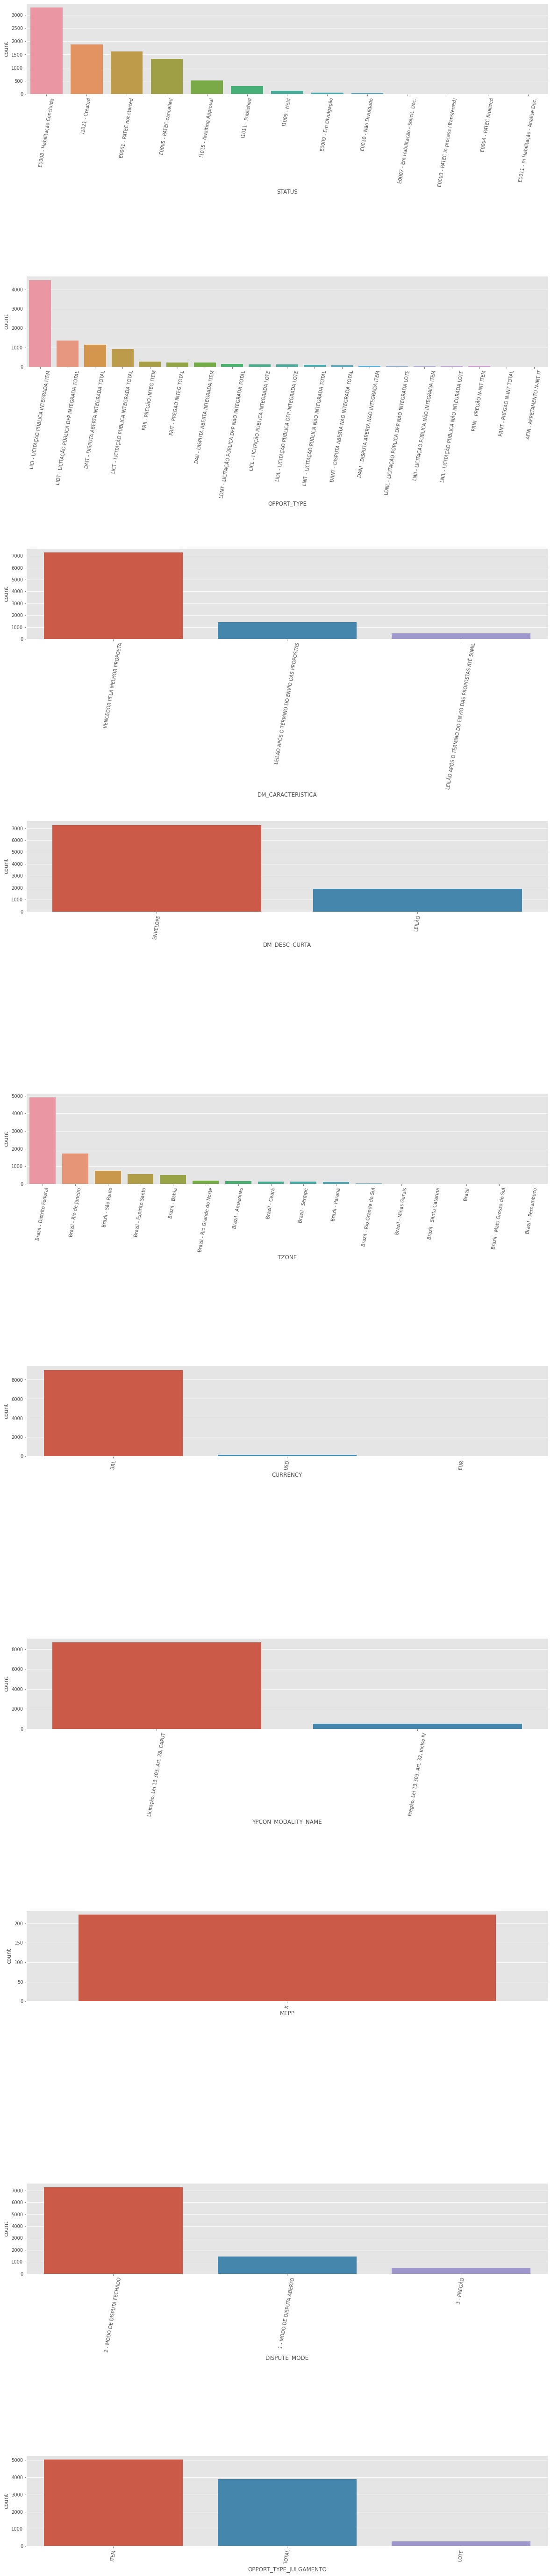

In [38]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:

  print(qtdplots)
  f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10))
  # Adjust the subplot layout parameters
  f.subplots_adjust(hspace=2, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    ax[idx]=sns.countplot(ax=ax[idx],x=plts, data=df, order=df[plts].value_counts().index)
    ax[idx].tick_params(axis='x', rotation=80)

<h2> plota alguns countplots para numéricos

<AxesSubplot:xlabel='YPCON_QUOTE_REQUEST', ylabel='count'>

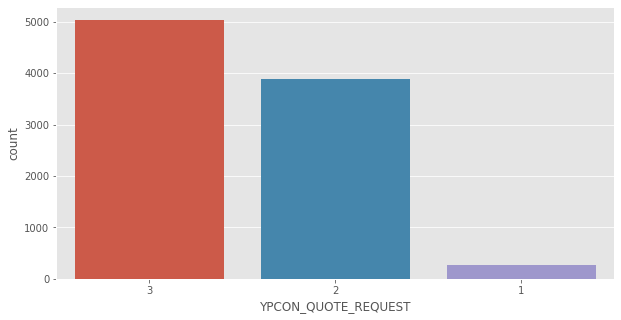

In [39]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='YPCON_QUOTE_REQUEST', data=df, order=df['YPCON_QUOTE_REQUEST'].value_counts().index)

In [40]:
df['END_DATE_H_MES'] = df['END_DATE_H'].dt.to_period('M')

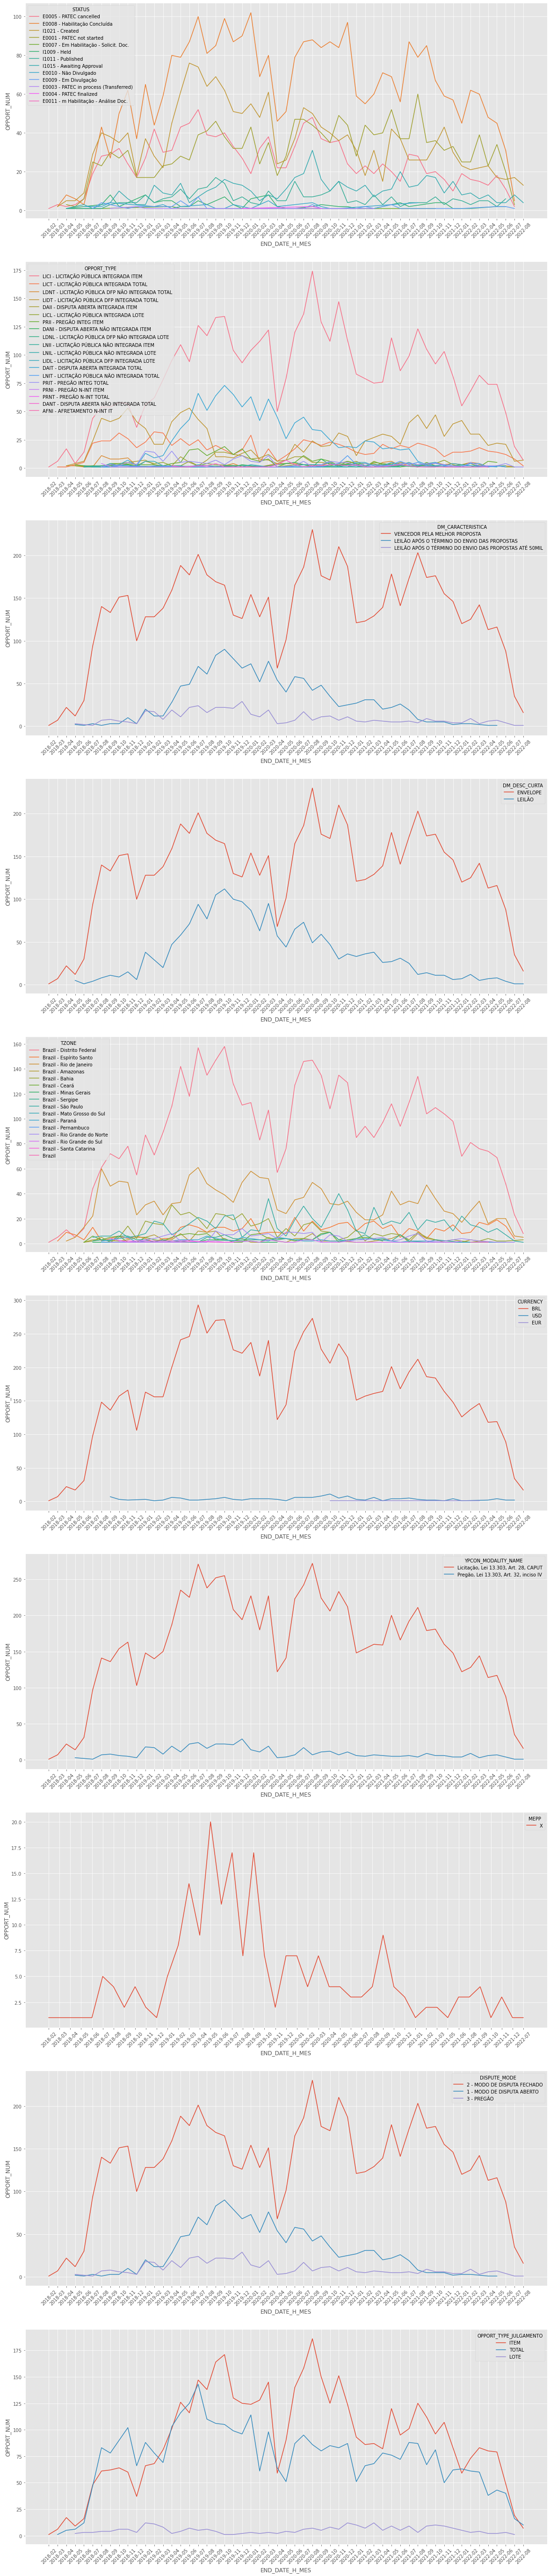

In [41]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:
  f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10)
  )
  #f.subplots_adjust(hspace=2, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    df_ano_mes = df.groupby(['END_DATE_H_MES',plts]).count()[['OPPORT_NUM']]
    df_ano_mes.reset_index(inplace=True)
    ax[idx]
    ax[idx]=sns.lineplot(ax=ax[idx],data=df_ano_mes,
                x=df_ano_mes['END_DATE_H_MES'].astype('str'), 
                y=df_ano_mes['OPPORT_NUM'], 
                ci=None, 
                hue=plts)
    ax[idx].tick_params(axis='x', rotation=45)

In [42]:
df['DURACAO']= (df['END_DATE_H'].dt.date - df['START_DATE_H'].dt.date).dt.days
df['DURACAO'].describe().to_frame()
df[['OPPORT_NUM','END_DATE_H','START_DATE_H','DURACAO']].sort_values('DURACAO',ascending=False)
df_duracao = df[df['START_DATE_H']!='1900-01-01 00:00:00']
std = df_duracao['DURACAO'].describe().T.to_frame().loc['std'][0]

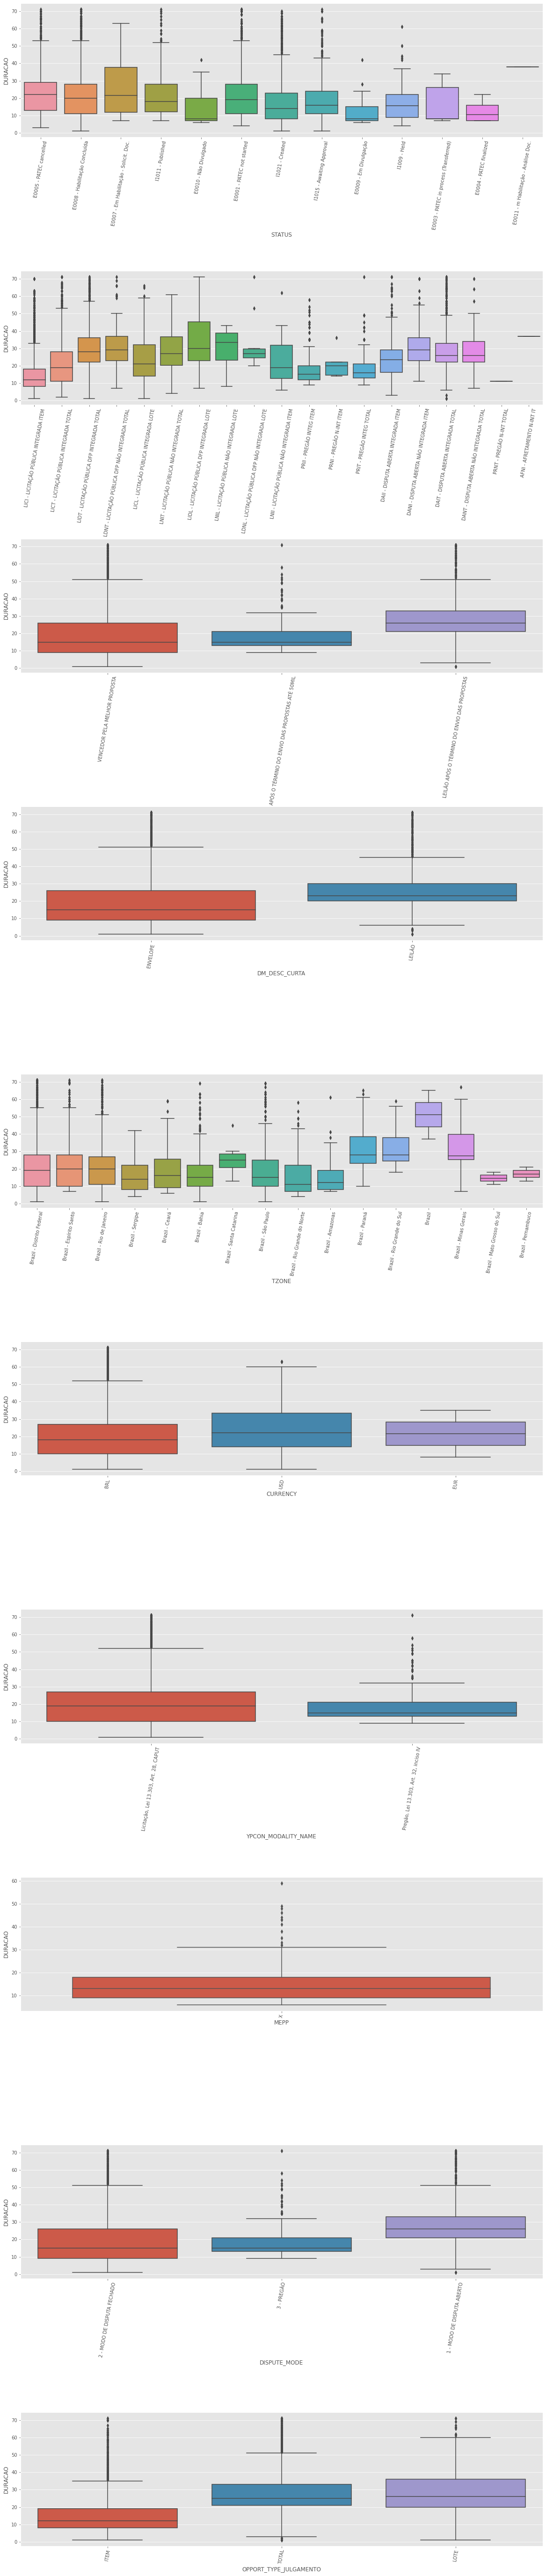

In [43]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:
  f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10))
  f.subplots_adjust(hspace=1, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    ax[idx]=sns.boxplot(ax=ax[idx],y='DURACAO',x=plts,data=df_duracao[df_duracao['DURACAO']<std*3])
    ax[idx].tick_params(axis='x', rotation=80)

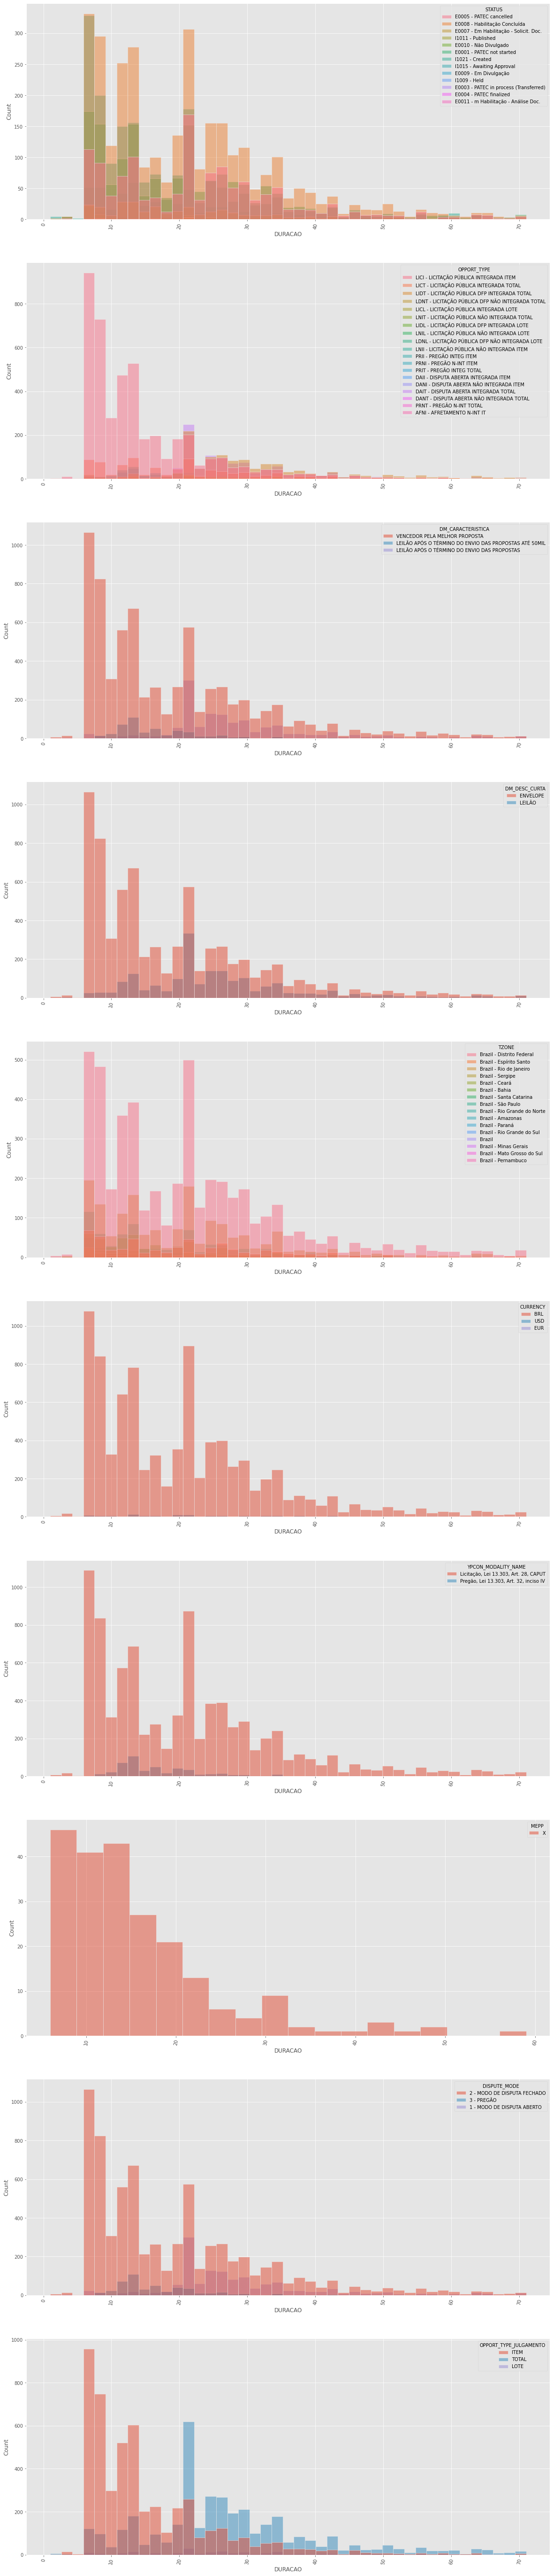

In [44]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:
  f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10))
  #f.subplots_adjust(hspace=2, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    ax[idx]=sns.histplot(ax=ax[idx],x='DURACAO',hue=plts, data=df_duracao[df_duracao['DURACAO']<std*3])
    ax[idx].tick_params(axis='x', rotation=80)

In [45]:
df.to_pickle('Principal.pkl')
df.to_excel('Principal.xlsx')